In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
%%bash

rm -Rf train-images-idx3-ubyte.gz
rm -Rf train-labels-idx1-ubyte.gz 
wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2018-10-02 09:43:23--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com... 216.165.22.6
Connecting to yann.lecun.com|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: 'train-images-idx3-ubyte.gz'

     0K .......... .......... .......... .......... ..........  0%  309K 31s
    50K .......... .......... .......... .......... ..........  1%  700K 22s
   100K .......... .......... .......... .......... ..........  1% 15.1M 15s
   150K .......... .......... .......... .......... ..........  2% 7.46M 12s
   200K .......... .......... .......... .......... ..........  2%  748K 12s
   250K .......... .......... .......... .......... ..........  3% 9.96M 10s
   300K .......... .......... .......... .......... ..........  3%  709K 10s
   350K .......... .......... .......... .......... ..........  4% 3.55M 9s
   400K .......... .......... .......... .......... ..........  4% 

# Reading the labels

There are 10 possible handwritten digits: (0-9), therefore every label must be a number from 0 to 9. The file that we downloaded, `train-labels-idx1-ubyte.gz`, encodes labels as following:

### TRAINING SET LABEL FILE (train-labels-idx1-ubyte):

```
[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000801(2049) magic number (MSB first) 
0004     32 bit integer  60000            number of items 
0008     unsigned byte   ??               label 
0009     unsigned byte   ??               label 
........ 
xxxx     unsigned byte   ??               label
The labels values are 0 to 9.
```

So it looks like the first 8 bytes (or the first 2 32-bit integers) can be skipped because they contain metadata of the file that is usually useful to lower-level programming languages.
To parse the file, we can perform the following operations:

- Open the file using the gzip library, so that we can decompress the file
- Read the entire byte array into memory
- Skip the first 8 bytes
- Iterate over every byte, and cast that byte to integer

NOTE: If this file was not from a trusted source, a lot more checking would need to be done. For the purpose of this blog post, I'm going to assume the file is valid in it's integrity.

In [3]:
import gzip

with gzip.open('train-labels-idx1-ubyte.gz') as train_labels:
    data_from_train_file = train_labels.read()

# Skip the first 8 bytes, we know exactly how many labels there are
label_data = data_from_train_file[8:]
assert len(label_data) == 60000

# Convert every byte to an integer. This will be a number between 0 and 9
labels = [int(label_byte) for label_byte in label_data]
assert min(labels) == 0 and max(labels) == 9
assert len(labels) == 60000


## Reading the images



```
[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000803(2051) magic number 
0004     32 bit integer  60000            number of images 
0008     32 bit integer  28               number of rows 
0012     32 bit integer  28               number of columns 
0016     unsigned byte   ??               pixel 
0017     unsigned byte   ??               pixel 
........ 
xxxx     unsigned byte   ??               pixel
```

In [17]:
from typing import List

SIZE_OF_ONE_IMAGE = 28 ** 2

images: List[List[int]] = []

with gzip.open('train-images-idx3-ubyte.gz') as train_images:
    train_images.read(4 * 4)
    ctr = 0
    for _ in range(60000):
        image = train_images.read(size=SIZE_OF_ONE_IMAGE)
        assert len(image) == SIZE_OF_ONE_IMAGE
        images.append(image)

In [18]:
len(images)

60000

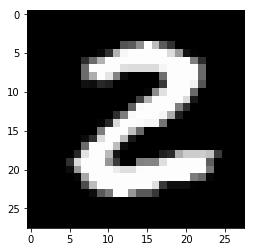

In [22]:
import numpy as np
pixels = np.frombuffer(images[25], dtype='uint8').reshape((28, 28))

%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(pixels, cmap='gray')
plt.show()